### 라이브러리 임포트

In [1]:
from PIL import ImageFont, ImageDraw, Image
import cv2              # OpenCV로 이미지 정제
import pytesseract      # OCR을 할 메인 엔진
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### 텍스트 추출

In [2]:
test1_path = r'C:\ITStudy\100_SelfProject\2nd_TechSeminar\Data\Tesseract_set\test_1.png'
test2_path = r'D:\ITStudy\10_WooriFISA\2nd_Tech_Seminar\Data\Tesseract_set\test_2.png'
test3_path = r'C:\ITStudy\100_SelfProject\2nd_TechSeminar\Data\Tesseract_set\test_4.png'
panel_path = r'D:\ITStudy\10_WooriFISA\2nd_Tech_Seminar\Data\panel2.jpg'
image = Image.open(test3_path)
text = pytesseract.image_to_string(image, lang='kor+eng')

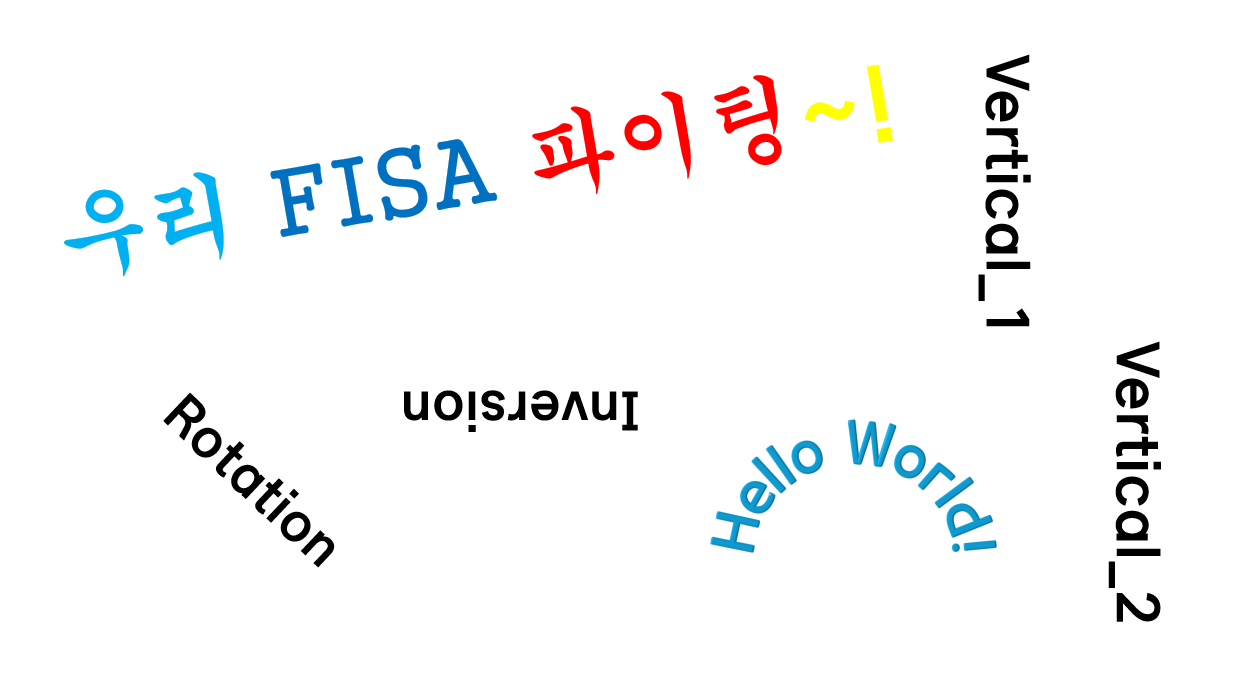

In [3]:
image

In [23]:
print(text)

Vertical_2

Vertical_1
3s
그          $
0                  %
;                           H
cn          _
>
변                 5
<         a.
U2           5
er
떠          Ss
Cy
a Se



### 이미지 시각화

In [24]:
def tesseract_ocr_extract(image_path):
    
    image = cv2.imread(image_path)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = pytesseract.image_to_data(rgb, output_type=pytesseract.Output.DICT)

    return_list = [{
            "left": results["left"][i],
            "top": results["top"][i],
            "width": results["width"][i],
            "height": results["height"][i],
            "text": results["text"][i],
            "confidence": int(results["conf"][i])
            } for i in range(len(results["text"]))]
    
    return return_list

In [25]:
box_list = tesseract_ocr_extract(test3_path)

In [26]:
# 테서렉트가 분석하면서 회차별로 정보를 저장한 box_list
box_list

[{'left': 0,
  'top': 0,
  'width': 1233,
  'height': 695,
  'text': '',
  'confidence': -1},
 {'left': 1109,
  'top': 342,
  'width': 52,
  'height': 280,
  'text': '',
  'confidence': -1},
 {'left': 1109,
  'top': 342,
  'width': 52,
  'height': 280,
  'text': '',
  'confidence': -1},
 {'left': 1109,
  'top': 342,
  'width': 52,
  'height': 280,
  'text': '',
  'confidence': -1},
 {'left': 1109,
  'top': 342,
  'width': 52,
  'height': 280,
  'text': 'Vertical_2',
  'confidence': 92},
 {'left': 154,
  'top': 55,
  'width': 877,
  'height': 512,
  'text': '',
  'confidence': -1},
 {'left': 154,
  'top': 55,
  'width': 877,
  'height': 512,
  'text': '',
  'confidence': -1},
 {'left': 978,
  'top': 55,
  'width': 53,
  'height': 271,
  'text': '',
  'confidence': -1},
 {'left': 978,
  'top': 55,
  'width': 53,
  'height': 271,
  'text': 'Vertical_1',
  'confidence': 90},
 {'left': 894,
  'top': 445,
  'width': 103,
  'height': 107,
  'text': '',
  'confidence': -1},
 {'left': 894,
  't

In [8]:
df = pd.DataFrame(box_list)

print(df)

    left  top  width  height       text  confidence
0      0    0   1234     688                     -1
1    617  365    234      42                     -1
2    617  365    234      42                     -1
3    617  365    234      42                     -1
4    617  365    234      42  UOISJOAUT           3
5    595  465    328     117                     -1
6    595  465    328     117                     -1
7    595  465    328     117                     -1
8    595  461    111     125         so          48
9    732  465    191     117         Wo           0
10   851  576     83      33                     -1
11   851  576     83      33                     -1
12   851  576     83      33                     -1
13   851  576     83      33       ~==w           1
14   985   55     46     271                     -1
15   985   55     46     271                     -1
16   985   55     46     271                     -1
17   986  309     43      17          L          92
18   985   5

In [18]:
print(df[['text', 'confidence']])

         text  confidence
0                      -1
1                      -1
2                      -1
3                      -1
4   UOISJOAUT           3
5                      -1
6                      -1
7                      -1
8          so          48
9          Wo           0
10                     -1
11                     -1
12                     -1
13       ~==w           1
14                     -1
15                     -1
16                     -1
17          L          92
18       [DDS           0
19                     -1
20                     -1
21                     -1
22          C          69
23     [DSISA           0


In [27]:
try:
    font = ImageFont.truetype("malgun.ttf", 15)
except IOError:
    font = ImageFont.load_default() # 폰트 파일이 없을 경우 기본 폰트 사용

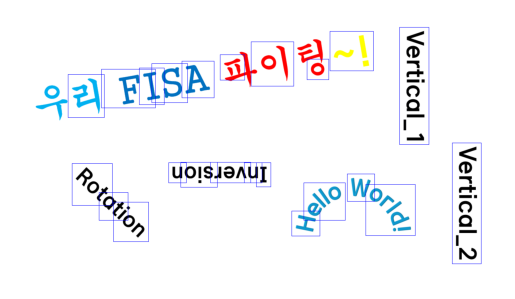

In [28]:
total_image = image.copy()
draw = ImageDraw.Draw(total_image)
margin = 10 
output_filename = 'test_3 full box.png'
# 인식된 텍스트와 바운딩 박스를 이미지에 그리기
for bbox in box_list:
    if bbox['text'] == '':
        continue

    top_left = tuple((bbox['left']- margin, bbox['top']- margin))
    bottom_right = tuple((bbox['left']+bbox['width']+ margin, bbox['top']+bbox['height']+ margin))

    # 바운딩 박스 그리기
    draw.rectangle((top_left, bottom_right), outline="blue", width=1)

    # # 텍스트 그리기 (박스 위에 위치)
    # text_position = (top_left[0], top_left[1] - 20)
    # draw.text(text_position, text, font=font, fill="black")

# 결과 이미지 출력
# plt.figure(figsize=(10, 6))
plt.imshow(total_image)
plt.axis('off')  # 축 눈금 숨기기
plt.savefig(
    output_filename,
    dpi=300,  # 해상도(Dots Per Inch) 설정
    bbox_inches='tight' # 그래프 주변의 불필요한 여백을 최소화
)
plt.show()

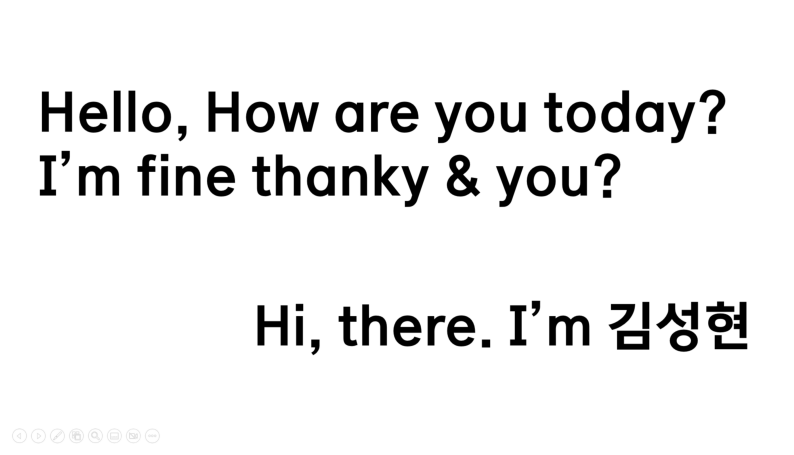

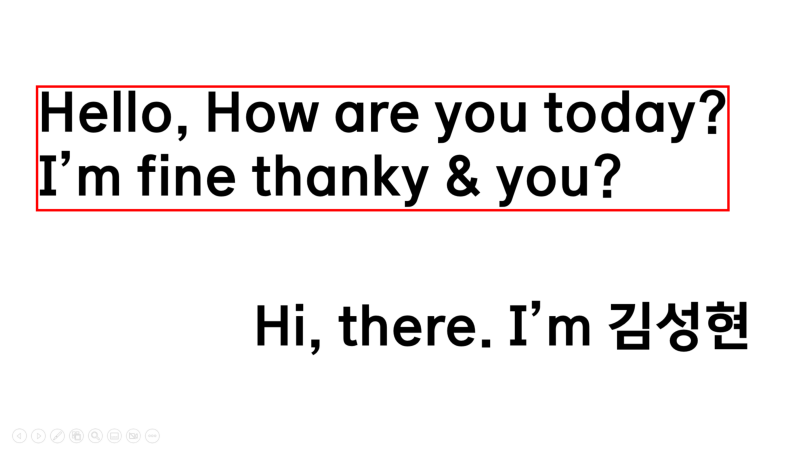

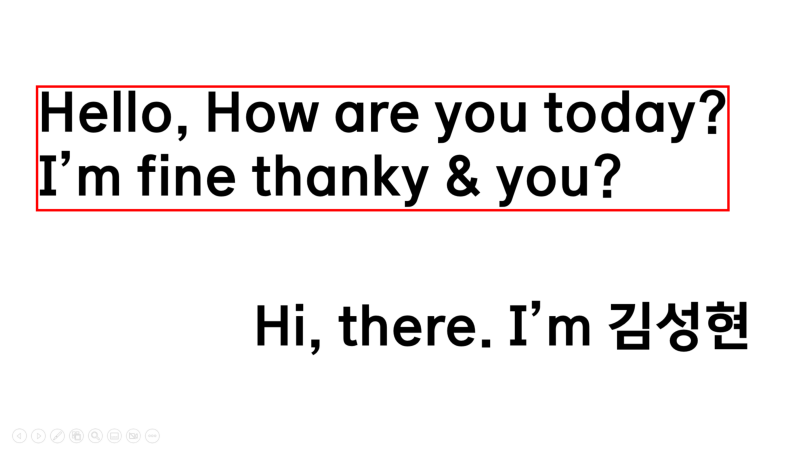

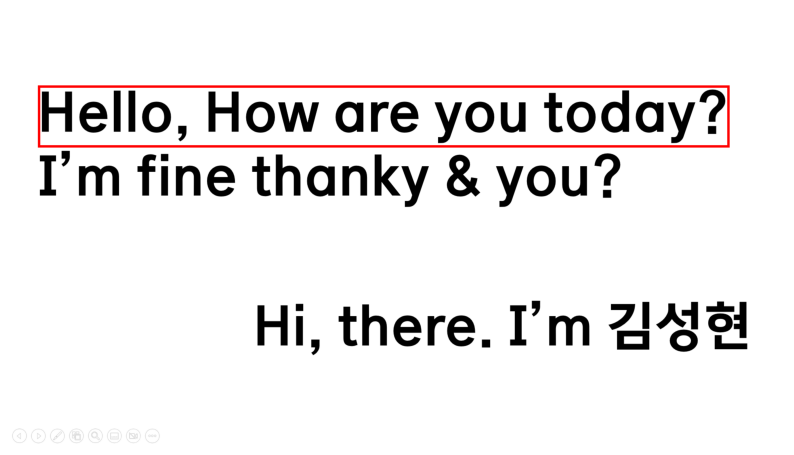

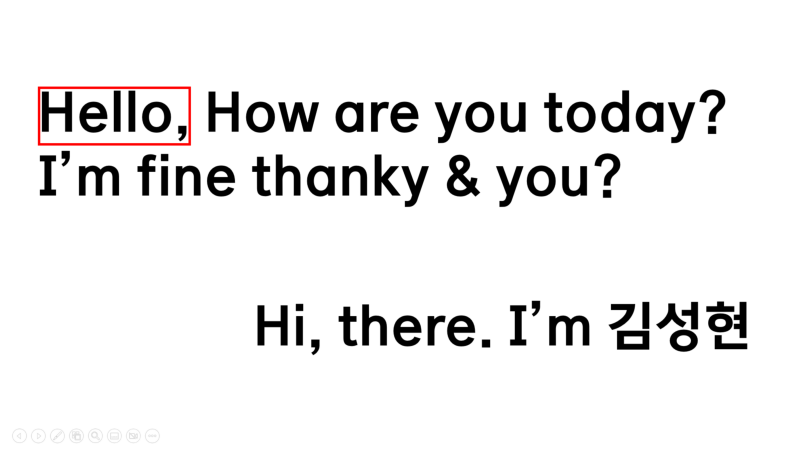

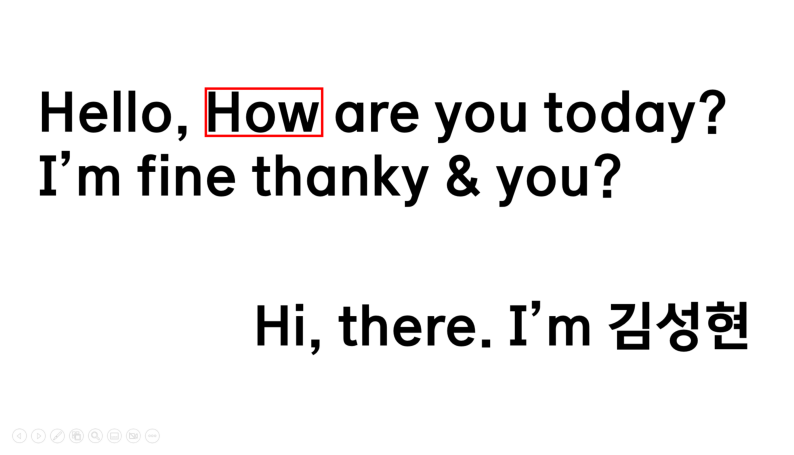

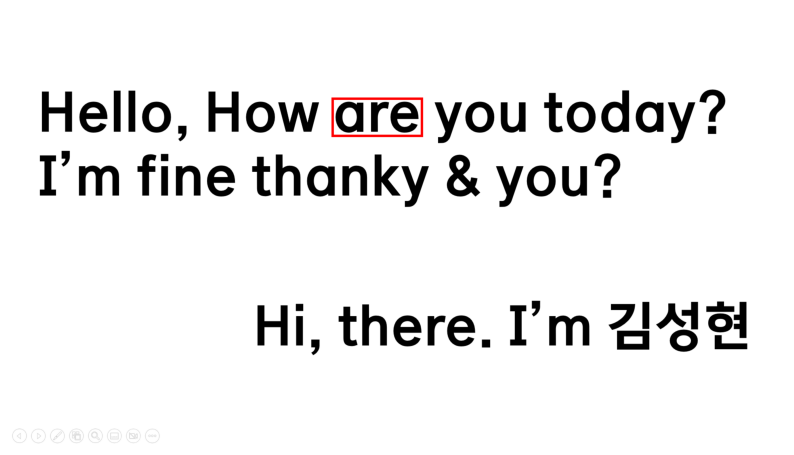

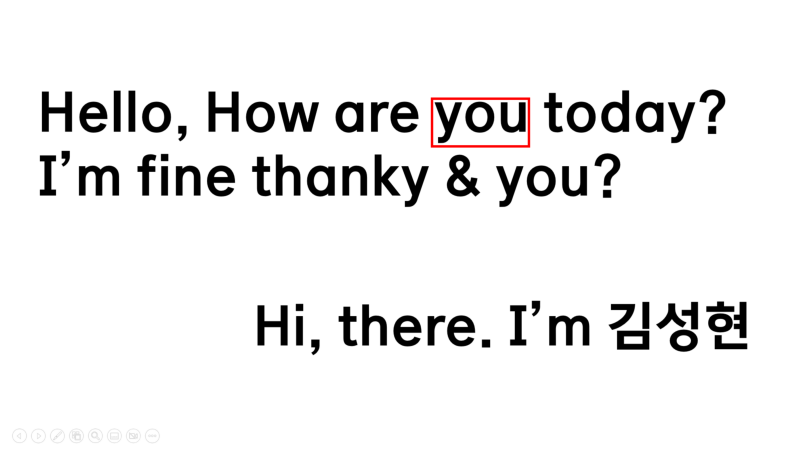

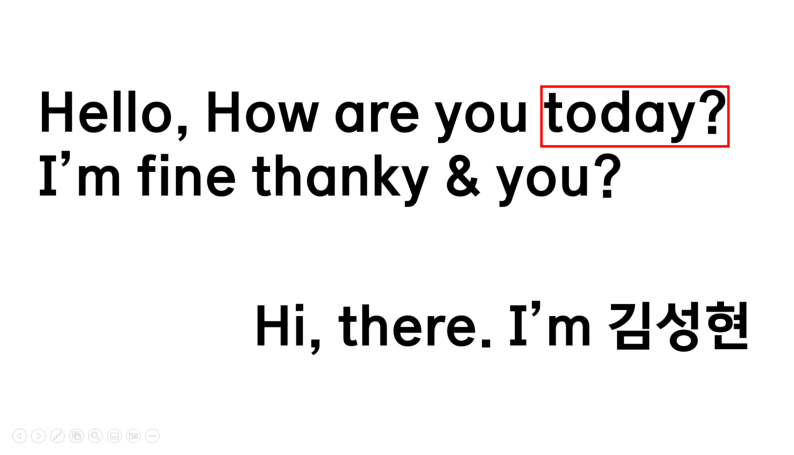

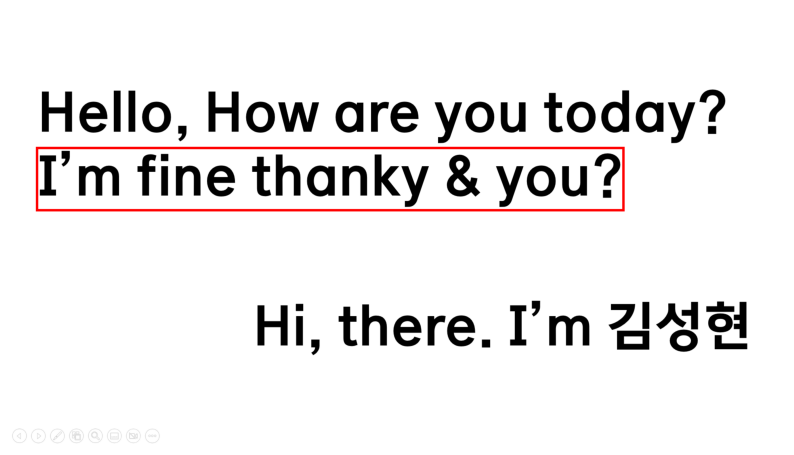

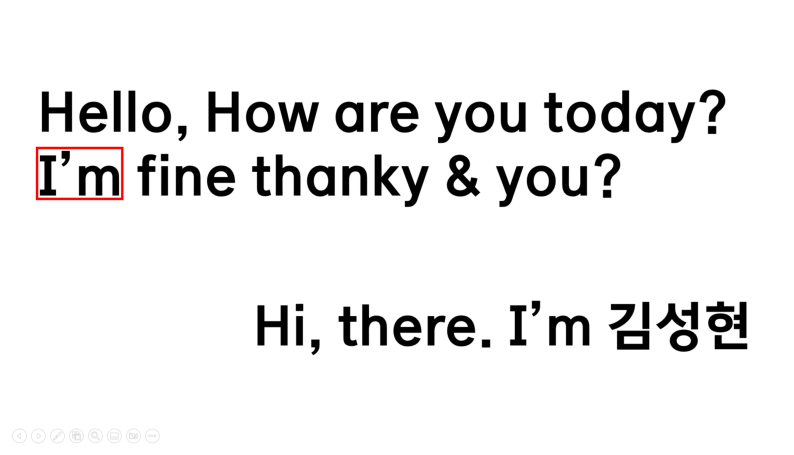

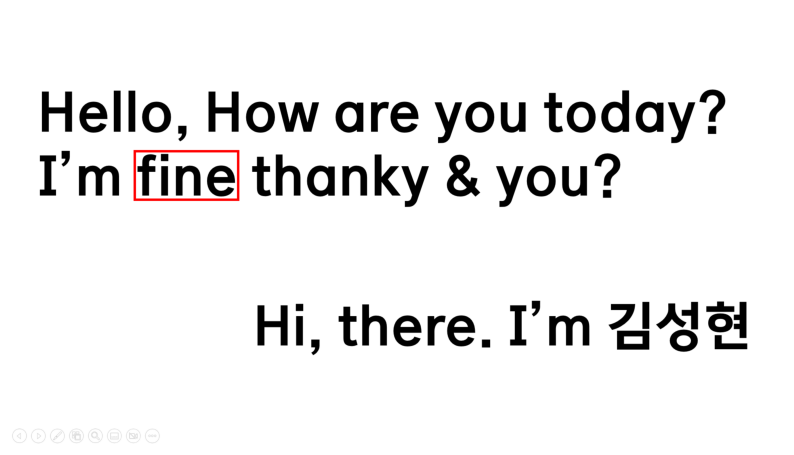

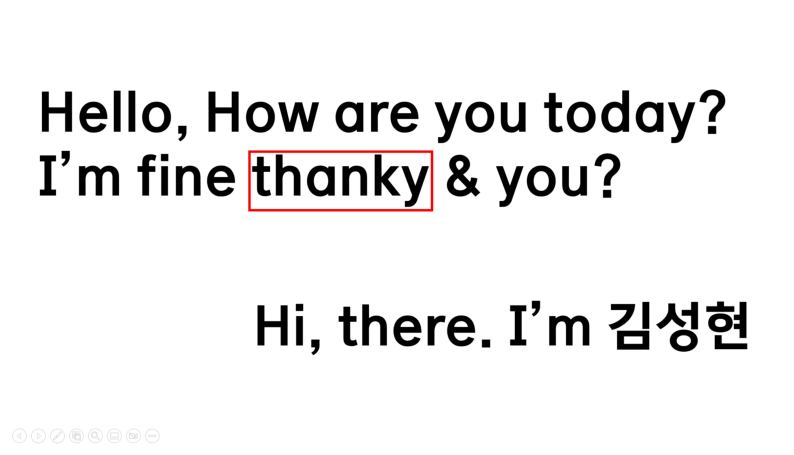

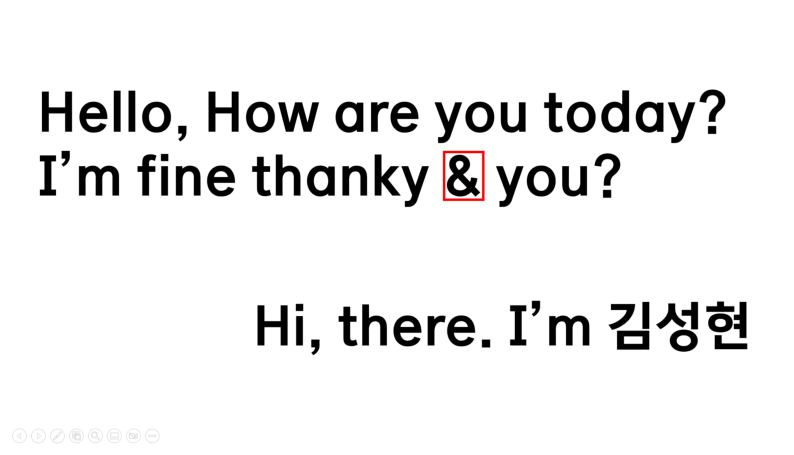

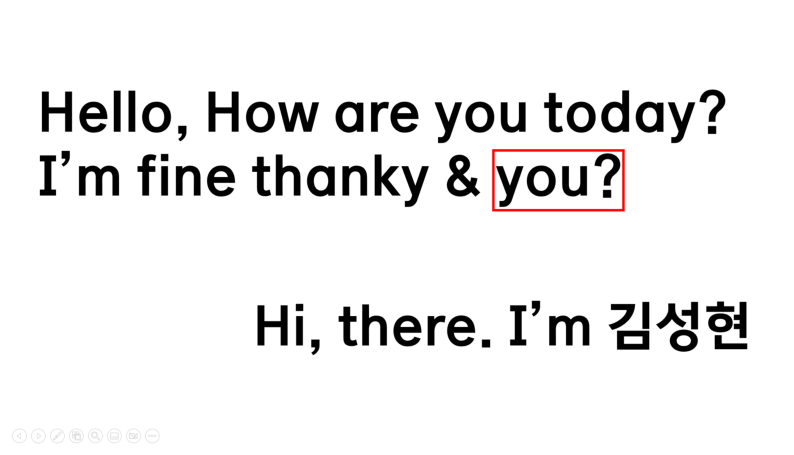

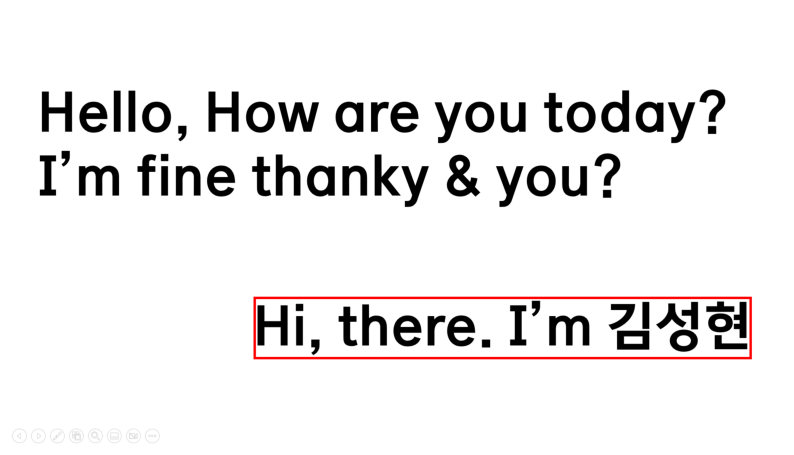

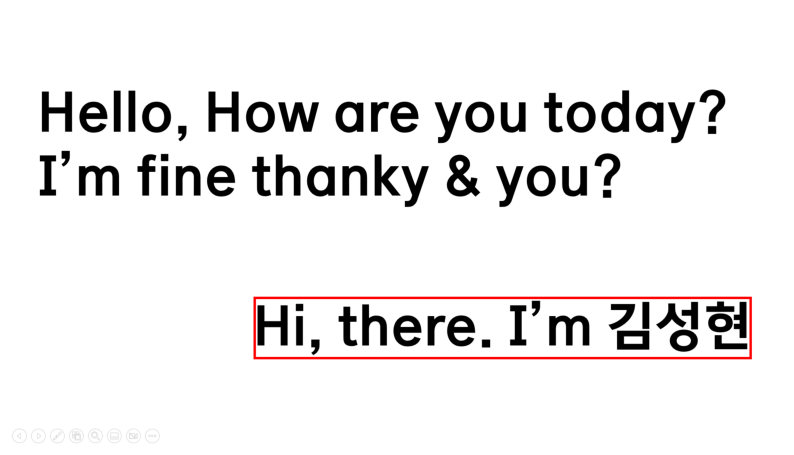

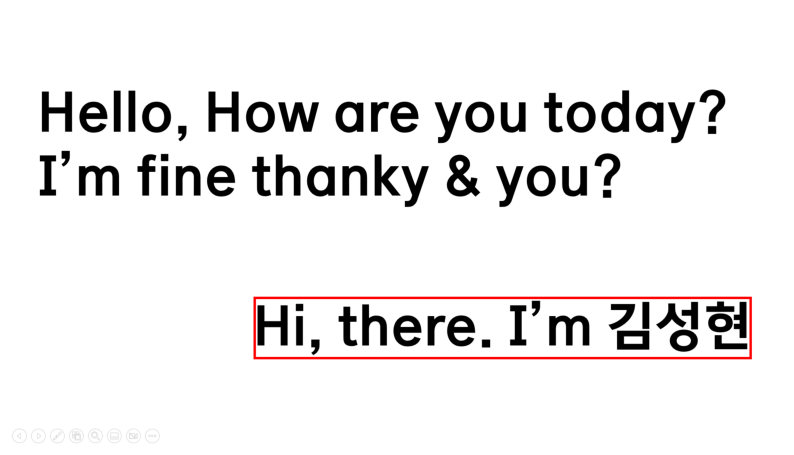

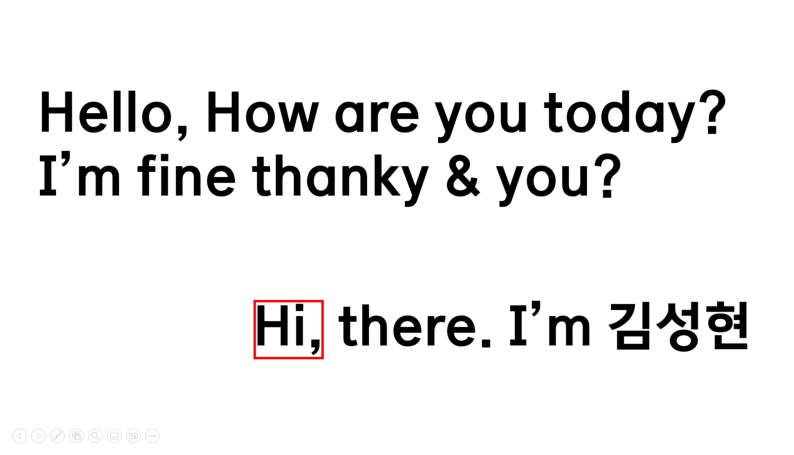

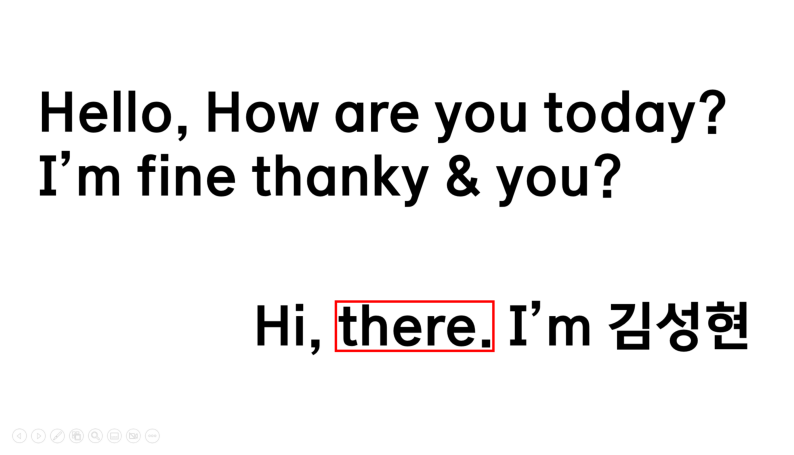

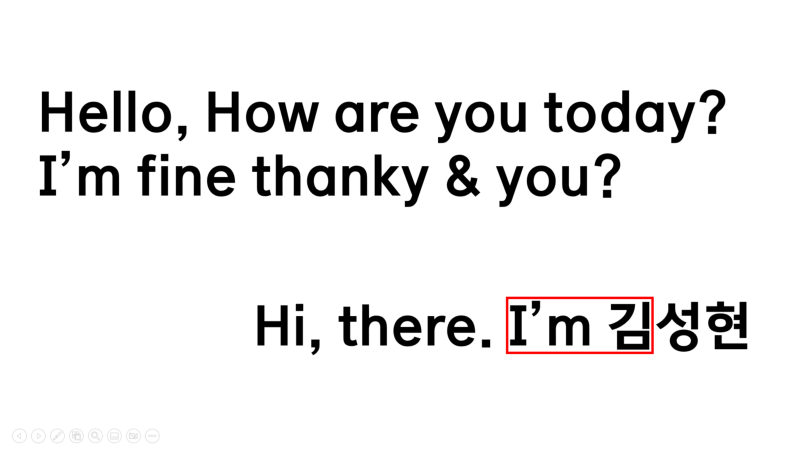

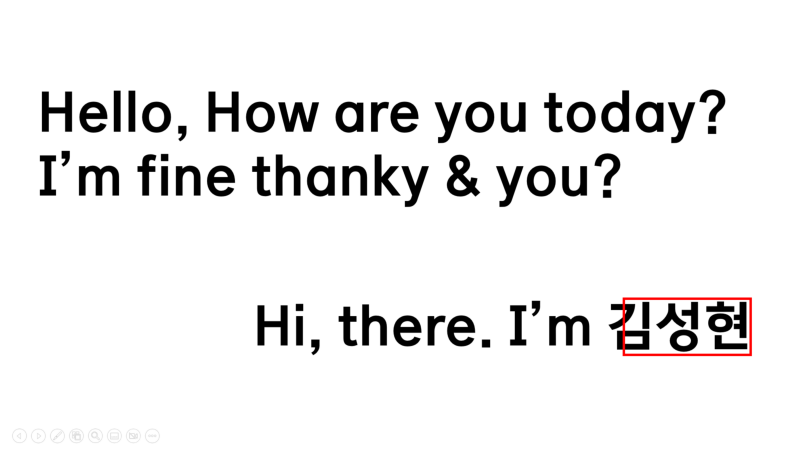

In [13]:
output_folder = "pytesseract_output"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

margin = 10

for i, bbox in enumerate(box_list):
    image_to_draw = image.copy()
    draw = ImageDraw.Draw(image_to_draw)

    top_left = (bbox['left']-margin, bbox['top']-margin)
    bottom_right = (bbox['left'] + bbox['width']+margin, bbox['top'] + bbox['height']+margin)
    draw.rectangle((top_left, bottom_right), outline="red", width=6)


    fig = plt.figure(figsize=(10, 6))
    plt.imshow(image_to_draw)
    plt.axis('off')

    filename = f"test_1 process {i+1:02d}.png"
    save_path = os.path.join(output_folder, filename)
    
    # plt.show()를 호출하기 전에 저장
    plt.savefig(save_path, dpi=300,bbox_inches='tight')

    plt.show()
    plt.close(fig)

### 출처
파이테서렉트 공식문서: https://pypi.org/project/pytesseract/  
동작 원리 -> EasyOCR 까지: https://velog.io/@xpelqpdj0422/11.-OCR-%EA%B8%B0%EC%88%A0%EC%9D%98-%EA%B0%9C%EC%9A%94

